In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [36]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [37]:
print('y_train shape:', y_train.shape)


y_train shape: (50000, 1)


In [38]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


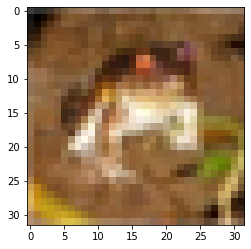

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [40]:
print('The label is:', y_train[0])

The label is: [6]


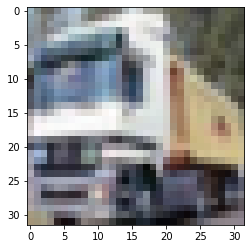

In [41]:
img = plt.imshow(x_train[1])


In [42]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [43]:
print('The one hot label is:', y_train_one_hot[1])


The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [44]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [45]:
x_train[0]


array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD


In [60]:
# example of a 3-block vgg style architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [61]:

# example output part of the model


In [62]:
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
hist = model.fit(x_train, y_train_one_hot, batch_size=16, epochs=400, validation_split=0.2)

Epoch 1/400
2500/2500 [==============================] - 10s 4ms/step - loss: 2.0277 - accuracy: 0.2387 - val_loss: 1.5649 - val_accuracy: 0.4288
Epoch 2/400
2500/2500 [==============================] - 9s 4ms/step - loss: 1.5678 - accuracy: 0.4229 - val_loss: 1.3488 - val_accuracy: 0.5090
Epoch 3/400
2500/2500 [==============================] - 9s 4ms/step - loss: 1.3616 - accuracy: 0.5084 - val_loss: 1.1897 - val_accuracy: 0.5746
Epoch 4/400
2500/2500 [==============================] - 9s 4ms/step - loss: 1.2182 - accuracy: 0.5627 - val_loss: 1.0699 - val_accuracy: 0.6153
Epoch 5/400
2500/2500 [==============================] - 9s 4ms/step - loss: 1.1049 - accuracy: 0.6065 - val_loss: 1.0031 - val_accuracy: 0.6553
Epoch 6/400
2500/2500 [==============================] - 9s 4ms/step - loss: 1.0286 - accuracy: 0.6345 - val_loss: 0.9220 - val_accuracy: 0.6738
Epoch 7/400
2500/2500 [==============================] - 9s 4ms/step - loss: 0.9431 - accuracy: 0.6705 - val_loss: 0.8405 - val_a

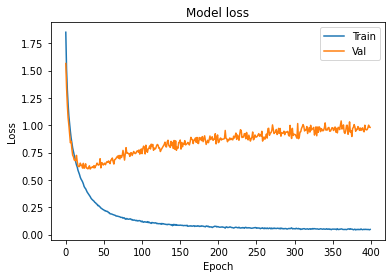

In [64]:
 plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

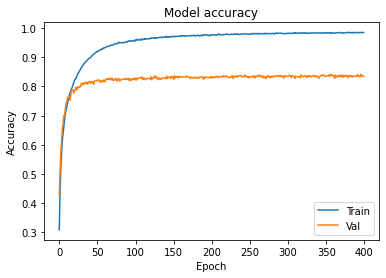

In [65]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(x_test, y_test_one_hot)[1]


313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


0.10000000149011612

In [ ]:
model.save('my_cifar10_model.h5')

In [ ]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')

In [ ]:
my_image = plt.imread("/content/drive/MyDrive/cat.jpg")


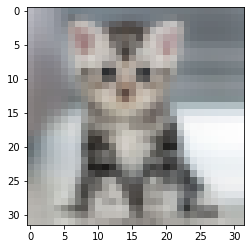

In [ ]:
from skimage.transform import resize

my_image_resized = resize(my_image,(32,32,3))
img = plt.imshow(my_image_resized)


In [ ]:
from kerastuner.tuners import RandomSearch

ModuleNotFoundError: ignored

ERROR: Could not find a version that satisfies the requirement kerastuner (from versions: none)
ERROR: No matching distribution found for kerastuner


ValueError: ignored